In [1]:
import numpy as np
import pandas as pd

In [2]:
cars = pd.read_csv("C:\\Users\\sunil\\Desktop\\Analogicx\\Datasets\\cars.csv")

In [3]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110.0,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110.0,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93.0,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110.0,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175.0,3.15,3.440,17.02,0,0,3,2


In [5]:
cars.isnull().sum()

model    0
mpg      4
cyl      0
disp     1
hp       1
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [6]:
cars = cars.fillna(cars.mean())

In [7]:
cars.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [8]:
X = cars.iloc[:,1:7]

In [10]:
X.head()

,mpg,cyl,disp,hp,drat,wt
0,21.0,6,160.0,110.0,3.90,2.620
1,21.0,6,160.0,110.0,3.90,2.875
2,22.8,4,108.0,93.0,3.85,2.320
3,21.4,6,258.0,110.0,3.08,3.215
4,18.7,8,360.0,175.0,3.15,3.440


In [11]:
y = cars.iloc[:,9]

In [12]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: am, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train,y_train)

C:\Users\sunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
predict = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix


In [21]:
accuracy_score(predict,y_test)

0.8571428571428571

In [23]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.80      1.00      0.89         4

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



In [24]:
confusion_matrix(predict,y_test)

array([[2, 1],
       [0, 4]], dtype=int64)

# KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
model2 = KNeighborsClassifier(n_neighbors= 5)

In [84]:
model2

KNeighborsClassifier()

In [85]:
model2.fit(X_train,y_train)

KNeighborsClassifier()

In [86]:
predict_knn = model2.predict(X_test)

In [87]:
accuracy_score(predict_knn,y_test)

0.7142857142857143

In [88]:
confusion_matrix(predict_knn,y_test)

array([[1, 1],
       [1, 4]], dtype=int64)

In [68]:
print(classification_report(predict_knn,y_test))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.60      0.75      0.67         4

    accuracy                           0.57         7
   macro avg       0.55      0.54      0.53         7
weighted avg       0.56      0.57      0.55         7



# Elbow Curve

In [75]:
error_rate = []

# Will take some time
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

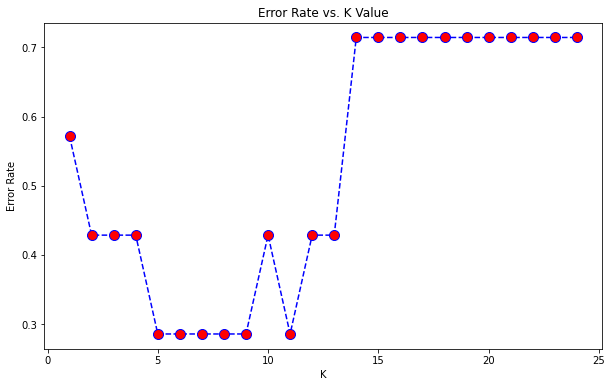

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))


plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')